In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV

In [6]:
to_drop = ['gene_id', 'transcript_id', 'transcript_position', 'sequence']
data = pd.read_csv("merged_data.csv").drop(to_drop, axis = 1 )

In [7]:
data.describe()

,avg_1-flank_length,avg_1-flank_std,avg_1-flank_mean,avg_central_length,avg_central_std,avg_central_mean,avg_1+flank_length,avg_1+flank_std,avg_1+flank_mean,med_1-flank_length,...,std_1-flank_length,std_1-flank_std,std_1-flank_mean,std_central_length,std_central_std,std_central_mean,std_1+flank_length,std_1+flank_std,std_1+flank_mean,label
count,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,...,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000,121838.000000
mean,0.008108,4.342127,110.789403,0.008127,5.157547,110.946258,0.007057,2.974051,86.203293,0.006864,...,0.004887,1.528758,3.336146,0.004831,1.828684,3.194697,0.004001,1.260798,2.448322,0.044937
std,0.001787,1.936267,11.289521,0.001693,2.184069,12.460242,0.001296,0.894199,4.937330,0.001673,...,0.001505,0.759305,1.459925,0.001403,0.942802,1.000186,0.001170,0.716917,0.727562,0.207166
min,0.003616,1.361306,80.370000,0.003803,1.441381,87.071498,0.003537,1.350225,72.231429,0.002660,...,0.000953,0.218941,0.649221,0.001160,0.227231,0.601585,0.000900,0.175260,0.520369,0.000000
25%,0.006799,2.853595,104.596000,0.006904,3.221361,98.816048,0.006151,2.282982,82.050397,0.005640,...,0.003805,0.928450,2.230443,0.003839,0.956595,2.428203,0.003194,0.688769,1.939124,0.000000
50%,0.007760,3.835318,110.122035,0.007834,4.669024,114.536673,0.006822,2.814199,86.500000,0.006515,...,0.004662,1.463543,3.056331,0.004645,1.851367,3.094400,0.003829,1.137486,2.356568,0.000000
75%,0.009101,5.420603,119.299837,0.009066,6.963261,121.552632,0.007714,3.494345,89.997368,0.007730,...,0.005731,2.026709,4.157467,0.005617,2.533590,3.858959,0.004612,1.682102,2.854246,0.000000
max,0.019119,11.644615,136.285714,0.021581,12.128800,137.120000,0.016344,11.898750,105.773134,0.017900,...,0.018516,33.715770,15.988131,0.020400,30.349842,9.739463,0.015972,30.331393,19.727495,1.000000


In [8]:
data.columns

Index(['avg_1-flank_length', 'avg_1-flank_std', 'avg_1-flank_mean',
       'avg_central_length', 'avg_central_std', 'avg_central_mean',
       'avg_1+flank_length', 'avg_1+flank_std', 'avg_1+flank_mean',
       'med_1-flank_length', 'med_1-flank_std', 'med_1-flank_mean',
       'med_central_length', 'med_central_std', 'med_central_mean',
       'med_1+flank_length', 'med_1+flank_std', 'med_1+flank_mean',
       'std_1-flank_length', 'std_1-flank_std', 'std_1-flank_mean',
       'std_central_length', 'std_central_std', 'std_central_mean',
       'std_1+flank_length', 'std_1+flank_std', 'std_1+flank_mean', 'label'],
      dtype='object')

**Correlation-Based Feature Selection** 

In [9]:
correlation_matrix = data.corr()

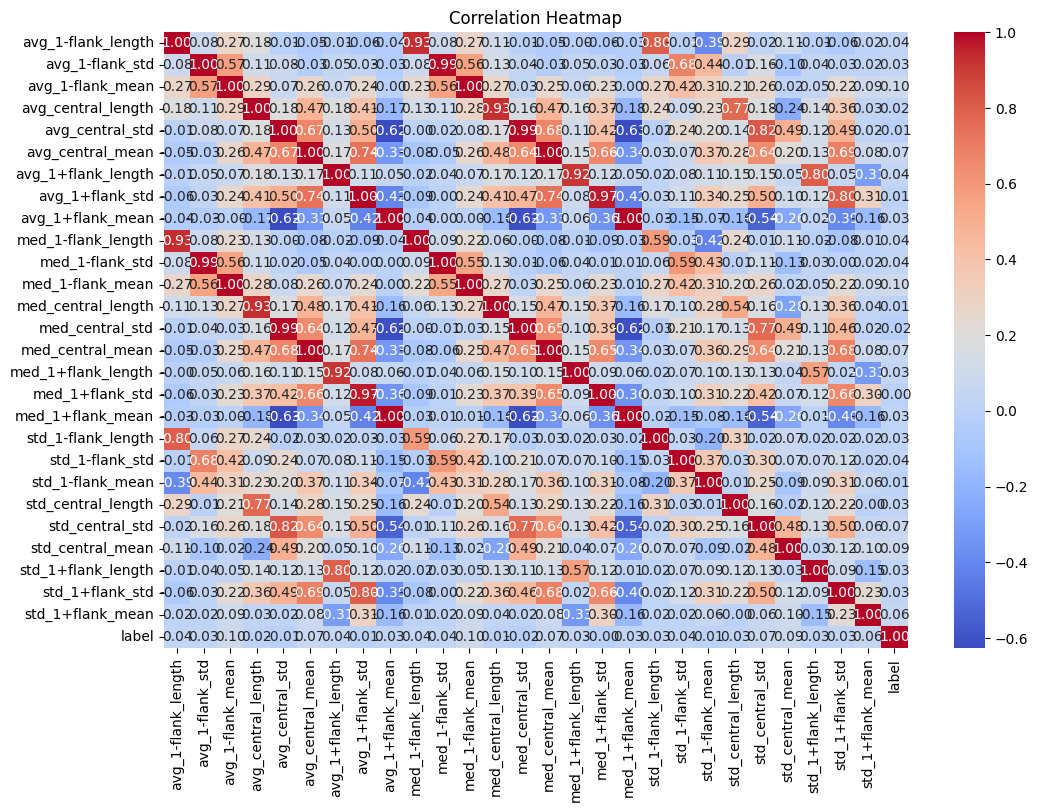

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


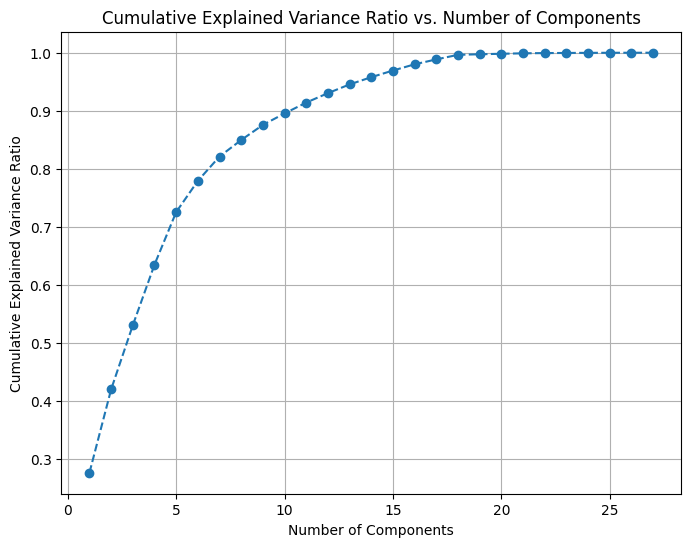

Number of components to retain 0.9 of variance: 11


In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
to_drop = ['gene_id', 'transcript_id', 'transcript_position', 'sequence']
data = pd.read_csv("merged_data.csv").drop(to_drop, axis = 1 )
target = data['label'] 
X = data.drop(columns=['label'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance Ratio")
plt.title("Cumulative Explained Variance Ratio vs. Number of Components")
plt.grid()
plt.show()

desired_variance_retained = 0.90  
n_components = len(cumulative_variance_ratio[cumulative_variance_ratio < desired_variance_retained]) + 1

print(f"Number of components to retain {desired_variance_retained} of variance: {n_components}")


**Recursive Feature Elimination (RFE)**

In [13]:
X = data.drop('label', axis=1)
y = data['label']
clf = LogisticRegression()

rfe = RFE(clf, n_features_to_select=11)

rfe.fit(X, y)
selected_features = [f for f, s in zip(X.columns, rfe.support_) if s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

In [14]:
selected_features 

['avg_central_mean',
 'avg_1+flank_std',
 'med_central_std',
 'med_central_mean',
 'med_1+flank_std',
 'std_1-flank_std',
 'std_1-flank_mean',
 'std_central_std',
 'std_central_mean',
 'std_1+flank_std',
 'std_1+flank_mean']

**Lasso**

In [15]:

target = data['label'] 
X = data.drop(columns=['label'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso_model = LassoCV(cv=5)

lasso_model.fit(X_scaled, target)

feature_importance = lasso_model.coef_

feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8831853523606696, tolerance: 0.4273178301015741
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4683923984484863, tolerance: 0.4273178301015741
  model = cd_fast.enet_coordinate_descent_gram(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5727932277204673, tolerance: 0.4273178301015741
  model = cd_fast.enet_co

In [20]:
feature_importance_df

,Feature,Importance
5,avg_central_mean,0.350522
2,avg_1-flank_mean,0.100711
10,med_1-flank_std,0.070243
8,avg_1+flank_mean,0.067814
23,std_central_mean,0.027602
22,std_central_std,0.022165
16,med_1+flank_std,0.017778
26,std_1+flank_mean,0.016281
19,std_1-flank_std,0.016248
6,avg_1+flank_length,0.015788


In [21]:
first_11_rows = feature_importance_df['Feature'].head(11)
first_11_rows.values.tolist()

['avg_central_mean',
 'avg_1-flank_mean',
 'med_1-flank_std',
 'avg_1+flank_mean',
 'std_central_mean',
 'std_central_std',
 'med_1+flank_std',
 'std_1+flank_mean',
 'std_1-flank_std',
 'avg_1+flank_length',
 'std_1+flank_std']